In [739]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import *
%matplotlib inline
font ={'family':'serif','weight':'bold','size':12}
matplotlib.rc('font',**font)
from mpl_toolkits.mplot3d import Axes3D
import os
import csv
import codecs
import math
from matplotlib.colors import LightSource, Normalize
import matplotlib.colors as colors
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

In [471]:
def gaus(x,a,x0,fwhm):
    sigma=fwhm/(2*((2*np.log(2))**0.5))
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
def Kmod(k):
    n=int(len(k)/3)
    A=np.zeros([n,3])
    A[:,0]=k[0:n]
    A[:,1]=k[n:2*n]
    A[:,2]=k[2*n:3*n]
    return A
def Krev(k):
    n=len(k)
    A=np.zeros(3*n)
    A[0:n]=k[:,0]
    A[n:2*n]=k[:,1]
    A[2*n:3*n]=k[:,2]
    return A
def Kmodarea(k):
    n=int(len(k)/3)
    A=np.zeros([n,4])
    A[:,0]=k[0:n]
    A[:,1]=k[n:2*n]
    A[:,2]=k[2*n:3*n]
    A[:,3]=A[:,1]*A[:,2]*((2*np.pi)**0.5)/(2*((2*np.log(2))**0.5))
    return A
def fullf(x,*k1):
    A=np.zeros(len(x))
    k=Kmod(k1)
    for i in range(len(k)):
        A=A+gaus(x,k[i,1],k[i,0],k[i,2])
    return A


In [567]:
base=str(os.getcwd())+"\\Lignin\\TGA\\Files\\"
fnames=os.listdir(base)
T_avg = np.linspace(373,900.15, num=600, endpoint=True)
Wp_raw=np.zeros([len(fnames),len(T_avg)])
H_raw=np.zeros([len(fnames),len(T_avg)])
alpha_raw=np.zeros([len(fnames),len(T_avg)])
time_raw=np.zeros([len(fnames),len(T_avg)])
pcont=np.zeros(len(fnames))
hr=np.zeros(len(fnames))
name=["le"]*len(fnames)
for p in range(len(fnames)):
    print(fnames[p])
    tem1=fnames[p].split('_')
    name[p]=tem1[0]
    tem2=tem1[1].split('K')
    hr[p]=float(tem2[0])
    file_object=codecs.open(base+fnames[p],'r')
    content=0
    content=file_object.readlines()
    for i in range(len(content)):
        if content[i]=='StartOfData\n':
            strt=i
            break
    size=(len(content)-1)-strt  # total length  - before start point of data 
    time=np.zeros(size)  
    T=np.zeros(size)
    W=np.zeros(size)
    H=np.zeros(size)
    for i in range(size):
        point=content[i+strt+1]  # strt is before data starts so i+1 is the counter from strt
        spl=point.split('\t')  
        time[i]=float(spl[0])*60
        T[i]=float(spl[1])+273.15
        W[i]=float(spl[2])
        H[i]=float(spl[3])
    time[:]=time[:]-time[0]
    for i in range(size-1):
        if T[i]<=1200.3 and T[i]>1200:
            ft=i
    FT=interp1d(T,time)
    F=interp1d(T,W)
    FH=interp1d(T,H)
    Wp_raw[p]=F(T_avg)
    time_raw[p]=FT(T_avg)
    time_raw[p]=time_raw[p]-time_raw[p,0]
    H_raw[p]=FH(T_avg)
    Wo=Wp_raw[p,0]
    Wp_raw[p]=Wp_raw[p]/Wo
    alpha_raw[p]=(1-Wp_raw[p])/(1-Wp_raw[p,len(T_avg)-1])

alpha_avg=np.mean(alpha_raw,0)
alpha_std=np.std(alpha_raw,0)
fmass=interp1d(T_avg,np.mean(alpha_raw,0))
#     f=open(fnames[p], 'w')
#     for yo in range(len(T_avg)):
# #         print(str(time_raw[p,yo])+","+str(T_avg[yo])+","+str(alpha_raw[p,yo]), file=f)
#         print(str(time_raw[p,yo])+",", file=f)
#         print(str(T_avg[yo])+",", file=f)
#         if yo==len(T_avg)-1:
#             print(str(alpha_raw[p,yo]), file=f)
#         if yo!=len(T_avg)-1:
#             print(str(alpha_raw[p,yo])+",", file=f)
#     f.close()

Lignin_10K_Ar_0.txt
Lignin_10K_Ar_1.txt
Lignin_10K_Ar_2.txt


In [568]:
base=str(os.getcwd())+"\\Lignocellulose_processed\\Lignin_KBr_100sccm_10K_0\\CSV_Processed\\"
# base1="C:/Users/kiranraj/Desktop/Kiranraj/FTIR autosaves/Lignocellulose_processed - Copy/Lignin_KBr_100sccm_10K_0/CSV_Processed"
folnames=os.listdir(base) 
Temp=np.zeros(len(folnames))
wv=np.zeros(6950)
Z0=np.zeros([len(folnames),6950])
for f in range(len(folnames)):
    xfile = open(base+folnames[f], "r")
    ftemp1=folnames[f].split('_')
    ftemp2=ftemp1[1].split('.CSV')
    ftempf=float(ftemp2[0])
    time=(ftempf-1)*44  # sample number to time in seconds
    Temper=0
    if time>=0 and time<480:
        Temper=20+(10/60)*time
    if time>=480 and time<1080:
        Temper=100
    if time>=1080 and time<4680:
        Temper=100+(10/60)*(time-1080)
    if time>=4680 and time<5280:
        Temper=700
    Temp[f]=Temper+273.15
    result=[]
    for i in xfile:
        result.append(i)
    for i in range(len(result)):
        temp1=result[i].split(',')
        temp2=temp1[1].split('\n')
        wv[i]=float(temp1[0])
        Z0[f,i]=float(temp2[0])
    xfile.close()

In [569]:
base=str(os.getcwd())+"\\Lignocellulose_processed\\Lignin_KBr_100sccm_10K_1\\CSV_Processed\\"
# base1="C:/Users/kiranraj/Desktop/Kiranraj/FTIR autosaves/Lignocellulose_processed - Copy/Lignin_KBr_100sccm_10K_0/CSV_Processed"
folnames=os.listdir(base) 
Temp=np.zeros(len(folnames))
wv=np.zeros(6950)
Z1=np.zeros([len(folnames),6950])
for f in range(len(folnames)):
    xfile = open(base+folnames[f], "r")
    ftemp1=folnames[f].split('_')
    ftemp2=ftemp1[1].split('.CSV')
    ftempf=float(ftemp2[0])
    time=(ftempf-1)*44  # sample number to time in seconds
    Temper=0
    if time>=0 and time<480:
        Temper=20+(10/60)*time
    if time>=480 and time<1080:
        Temper=100
    if time>=1080 and time<4680:
        Temper=100+(10/60)*(time-1080)
    if time>=4680 and time<5280:
        Temper=700
    Temp[f]=Temper+273.15
    result=[]
    for i in xfile:
        result.append(i)
    for i in range(len(result)):
        temp1=result[i].split(',')
        temp2=temp1[1].split('\n')
        wv[i]=float(temp1[0])
        Z1[f,i]=float(temp2[0])
    xfile.close()

In [570]:
base=str(os.getcwd())+"\\Lignocellulose_processed\\Lignin_KBr_100sccm_10K_2\\CSV_Processed\\"
# base1="C:/Users/kiranraj/Desktop/Kiranraj/FTIR autosaves/Lignocellulose_processed - Copy/Lignin_KBr_100sccm_10K_0/CSV_Processed"
folnames=os.listdir(base) 
Temp=np.zeros(len(folnames))
wv=np.zeros(6950)
Z2=np.zeros([len(folnames),6950])
for f in range(len(folnames)):
    xfile = open(base+folnames[f], "r")
    ftemp1=folnames[f].split('_')
    ftemp2=ftemp1[1].split('.CSV')
    ftempf=float(ftemp2[0])
    time=(ftempf-1)*44  # sample number to time in seconds
    Temper=0
    if time>=0 and time<480:
        Temper=20+(10/60)*time
    if time>=480 and time<1080:
        Temper=100
    if time>=1080 and time<4680:
        Temper=100+(10/60)*(time-1080)
    if time>=4680 and time<5280:
        Temper=700
    Temp[f]=Temper+273.15
    result=[]
    for i in xfile:
        result.append(i)
    for i in range(len(result)):
        temp1=result[i].split(',')
        temp2=temp1[1].split('\n')
        wv[i]=float(temp1[0])
        Z2[f,i]=float(temp2[0])
    xfile.close()

In [585]:
base2=str(os.getcwd())+"\\Lignin\\Test\\"
# base="C:/Users/Anti-spectre/Documents/Combustion lab/AIAA_PnE/FTIR_study/Cellulose DRIFTS/Data_CSV"
# folnames=os.listdir(base)
# fnames=os.listdir(base2)
fnames=base2+"Test.peaks"
OH=np.zeros([len(fnames),8])
num=np.zeros(len(fnames))
Tnum=np.zeros(len(fnames))
# ifile=open(base2+fnames[0])
ifile=open(fnames)
result=[]
for i in ifile:
    result.append(i)
k=np.zeros([len(result)-2,3])
for i in range(len(result)-2):
    temp1=result[i+1].split(' ')
    temp2=temp1[2].split('\t')
    k[i,0]=float(temp2[1])
    k[i,1]=float(temp2[2])
    k[i,2]=float(temp2[4])
k=k[np.argsort(k[:,0])]


In [617]:
# plt.plot(wv,fullf(wv,*Krev(k)))
# RE=np.zeros(Z[0,:])+0.1
Outputs0=np.zeros([len(Z[:,1]),len(Krev(k))])
Outputs1=np.zeros([len(Z[:,1]),len(Krev(k))])
Outputs2=np.zeros([len(Z[:,1]),len(Krev(k))])
lt=range(20,96,2)
# lt=[0]
Z=np.copy(Z0)
Outputs=np.zeros([len(Z[:,1]),len(Krev(k))])
Zp=np.copy(Z)
for i in range(len(Z[:,1])):
    spwv=np.array([wv[3000],wv[3500],wv[3550],wv[4000],wv[6500],wv[6550],wv[6600],wv[200],wv[300],wv[1500],wv[0],wv[6949]])
    spz=np.array([Z[i,3000],Z[i,3500],Z[i,3550],Z[i,4000],Z[i,6500],Z[i,6550],Z[i,6600],0,0,0,0,Z[i,6949]])
    f=np.poly1d(np.polyfit(spwv,spz,2))
    f1=interp1d(spwv,spz)
    Zp[i,:]=Z[i,:]-f1(wv)
# for i in range(len(Z[:,1])):
for i in lt:
    mins=np.concatenate([k[:,0]-2,k[:,1]*0,k[:,2]*0+10])
    maxs=np.concatenate([k[:,0]+2,k[:,1]*0+1,k[:,2]*0+200])
    popt,pcov = curve_fit(fullf,wv,Zp[i,:],p0=Krev(k),bounds=(mins,maxs),ftol=1e-4)
    Outputs[i,:]=popt
Outputs0=Outputs

Z=np.copy(Z1)
Outputs=np.zeros([len(Z[:,1]),len(Krev(k))])
Zp=np.copy(Z)
for i in range(len(Z[:,1])):
    spwv=np.array([wv[3000],wv[3500],wv[3550],wv[4000],wv[6500],wv[6550],wv[6600],wv[200],wv[300],wv[1500],wv[0],wv[6949]])
    spz=np.array([Z[i,3000],Z[i,3500],Z[i,3550],Z[i,4000],Z[i,6500],Z[i,6550],Z[i,6600],0,0,0,0,Z[i,6949]])
    f=np.poly1d(np.polyfit(spwv,spz,2))
    f1=interp1d(spwv,spz)
    Zp[i,:]=Z[i,:]-f1(wv)
    # for i in range(len(Z[:,1])):
for i in lt:
    mins=np.concatenate([k[:,0]-2,k[:,1]*0,k[:,2]*0+10])
    maxs=np.concatenate([k[:,0]+2,k[:,1]*0+1,k[:,2]*0+200])
    popt,pcov = curve_fit(fullf,wv,Zp[i,:],p0=Krev(k),bounds=(mins,maxs),ftol=1e-4)
    Outputs[i,:]=popt
Outputs1=Outputs

Z=np.copy(Z2)
Outputs=np.zeros([len(Z[:,1]),len(Krev(k))])
Zp=np.copy(Z)
for i in range(len(Z[:,1])):
    spwv=np.array([wv[3000],wv[3500],wv[3550],wv[4000],wv[6500],wv[6550],wv[6600],wv[200],wv[300],wv[1500],wv[0],wv[6949]])
    spz=np.array([Z[i,3000],Z[i,3500],Z[i,3550],Z[i,4000],Z[i,6500],Z[i,6550],Z[i,6600],0,0,0,0,Z[i,6949]])
    f=np.poly1d(np.polyfit(spwv,spz,2))
    f1=interp1d(spwv,spz)
    Zp[i,:]=Z[i,:]-f1(wv)
# for i in range(len(Z[:,1])):
for i in lt:
    mins=np.concatenate([k[:,0]-2,k[:,1]*0,k[:,2]*0+10])
    maxs=np.concatenate([k[:,0]+2,k[:,1]*0+1,k[:,2]*0+200])
    popt,pcov = curve_fit(fullf,wv,Zp[i,:],p0=Krev(k),bounds=(mins,maxs),ftol=1e-4)
    Outputs[i,:]=popt
Outputs2=Outputs

In [111]:
# Kmod(Outputs[0])
# def fullplot(x,*k1):
#     A=np.zeros(len(x))
#     k=Kmod(k1)
#     for i in range(len(k)):
#         A=A+gaus(x,k[i,1],k[i,0],k[i,2])
#         plt.plot(x,gaus(x,k[i,1],k[i,0],k[i,2]))
#     return A
# plt.figure(figsize=(20,10))
# fullplot(wv,*Outputs0[0])
# plt.plot(wv,fullf(wv,*Outputs0[0]))

In [618]:
pt=lt
Areas0=np.zeros([len(pt),len(k)])
Areas1=np.zeros([len(pt),len(k)])
Areas2=np.zeros([len(pt),len(k)])
Center0=np.zeros([len(pt),len(k)])
Center1=np.zeros([len(pt),len(k)])
Center2=np.zeros([len(pt),len(k)])
fwhm0=np.zeros([len(pt),len(k)])
fwhm1=np.zeros([len(pt),len(k)])
fwhm2=np.zeros([len(pt),len(k)])
Xp=np.zeros(len(pt))
for i in range(len(pt)):
    Xp[i]=Temp[pt[i]]
    Areas0[i,:]=Kmodarea(Outputs0[pt[i]])[:,3]
    Areas1[i,:]=Kmodarea(Outputs1[pt[i]])[:,3]
    Areas2[i,:]=Kmodarea(Outputs2[pt[i]])[:,3]
    Center0[i,:]=Kmodarea(Outputs0[pt[i]])[:,0]
    Center1[i,:]=Kmodarea(Outputs1[pt[i]])[:,0]
    Center2[i,:]=Kmodarea(Outputs2[pt[i]])[:,0]
    fwhm0[i,:]=Kmodarea(Outputs0[pt[i]])[:,2]
    fwhm1[i,:]=Kmodarea(Outputs1[pt[i]])[:,2]
    fwhm2[i,:]=Kmodarea(Outputs2[pt[i]])[:,2]


In [722]:
maxo=np.array([3600,3100,2960,1780,1740,1520,1480,1480,1390,1290,1180,1165,1060])
mino=np.array([3200,2980,2800,1740,1700,1480,1340,1400,1340,1230,1130,1130,1016])
OH0=np.zeros([len(lt),len(maxo)])
OH1=np.zeros([len(lt),len(maxo)])
OH2=np.zeros([len(lt),len(maxo)])
Nresults=np.zeros([len(lt),len(maxo)])
Nstd=np.zeros([len(lt),len(maxo)])
for i in range(len(lt)):
    OH0[i,:]=0
    OH1[i,:]=0
    OH2[i,:]=0
    for j in range(len(Center0[0,:])):
        for po in range(len(maxo)):
            if Center0[i,j]<maxo[po] and Center0[i,j]>mino[po]:  #OH stretching
                OH0[i,po]=OH0[i,po]+Areas0[i,j]
                
            if Center1[i,j]<maxo[po] and Center1[i,j]>mino[po]:  #OH stretching
                OH1[i,po]=OH1[i,po]+Areas1[i,j]

            if Center2[i,j]<maxo[po] and Center2[i,j]>mino[po]:  #OH stretching
                OH2[i,po]=OH2[i,po]+Areas2[i,j]
for i in range(len(maxo)):
    Cal=np.zeros([len(lt),3])
    Cal[:,0]=OH0[:,i]/np.max(OH0[:,i])
    Cal[:,1]=OH1[:,i]/np.max(OH1[:,i])
    Cal[:,2]=OH2[:,i]/np.max(OH2[:,i])
    Nresults[:,i]=np.mean(Cal,1)
    Nstd[:,i]=np.std(Cal,1)

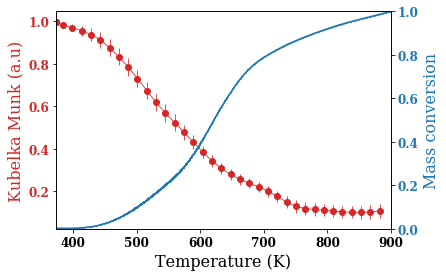

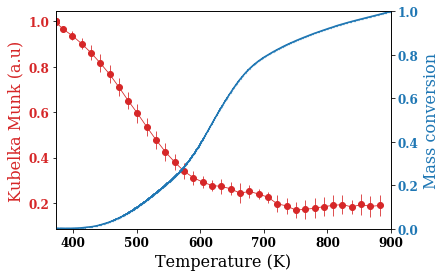

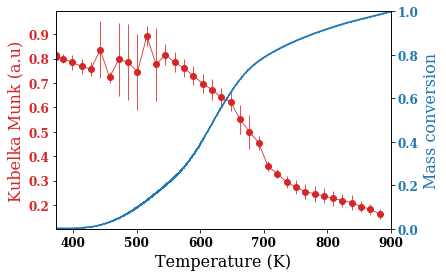

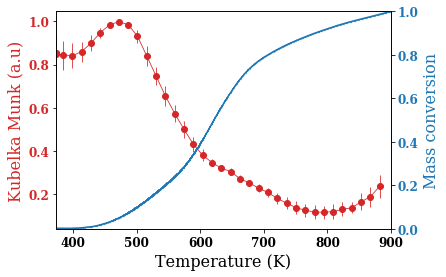

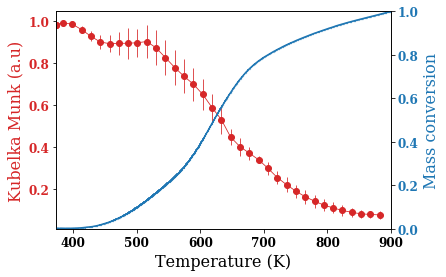

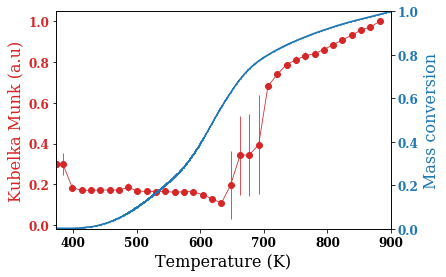

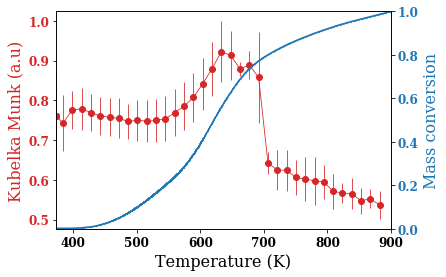

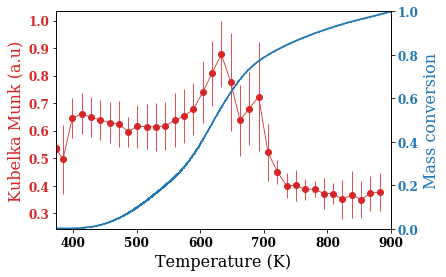

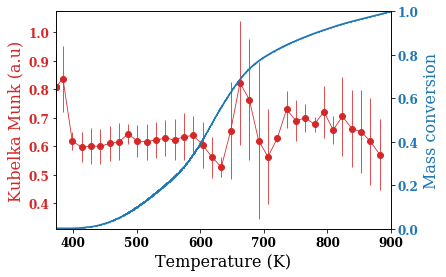

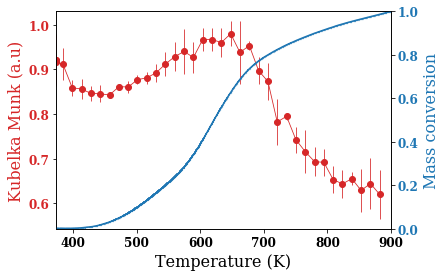

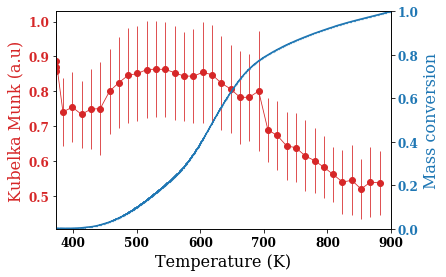

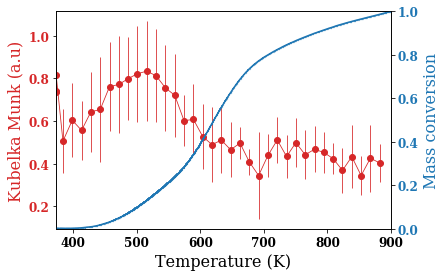

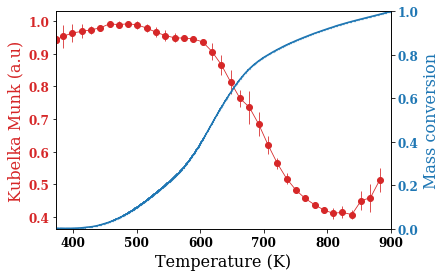

In [723]:
labels=["O-H","C-H_aromatic","C-H_aliph","C=O_ester","C=O_acid","C=C_aromatic","C-C_total","CH3_CH2_Ar","-CH3","Aromatic_ether","C-O_allphenols","C-O_phenol","C-O-C"]
for i in range(len(maxo)):
    TA=Nresults[:,i]
    fOH=np.poly1d(np.polyfit(Xp,TA,8))
    fig,ax1=plt.subplots()
    # plt.plot(Tnum,OH[:,0],'o')
    color='tab:red'
    ax1.set_xlabel("Temperature (K)",fontsize=16)
    ax1.set_ylabel("Kubelka Munk (a.u)",fontsize=16,color=color)
#     ax1.plot(Xp,fOH(Xp),'g--')
    ax1.set_xlim(373,900)
    ax1.errorbar(Xp,TA,yerr=Nstd[:,i],marker='o',elinewidth=0.8,linewidth=0.8,color=color)
#     ax1.legend()
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2=ax1.twinx()
    color='tab:blue'
    ax2.errorbar(T_avg,alpha_avg,yerr=alpha_std,marker='.',markersize=0.4,color=color,label="DTG")
    ax2.set_ylim(0,1)
#     ax2.legend()
    ax2.set_ylabel("Mass conversion",fontsize=16,color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.savefig(str(os.getcwd())+"\\Figures\\areaplot_"+labels[i]+".png",dpi=600,forward=True,bbox_inches='tight')



C:\Users\Anti-spectre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


(400, 900)

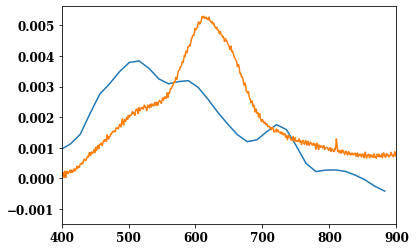

In [721]:
plt.plot(Xp,-np.gradient(Nresults[:,0])/np.gradient(Xp))
plt.plot(T_avg,np.gradient(alpha_avg)/np.gradient(T_avg))
plt.xlim([400,900])